In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import glob
from IPython.display import Latex
import IPython
import re
from scipy.integrate import solve_ivp
import datetime
import statsmodels.api as sm
import pytz


$$
I_n = \frac{k}{\Delta t \cdot i} Q_{n+i} + (1 - \frac{k}{\Delta t \cdot i}) Q_n
$$

$$
I(t) = Q(t) + k \frac{\partial Q}{\partial t}
$$

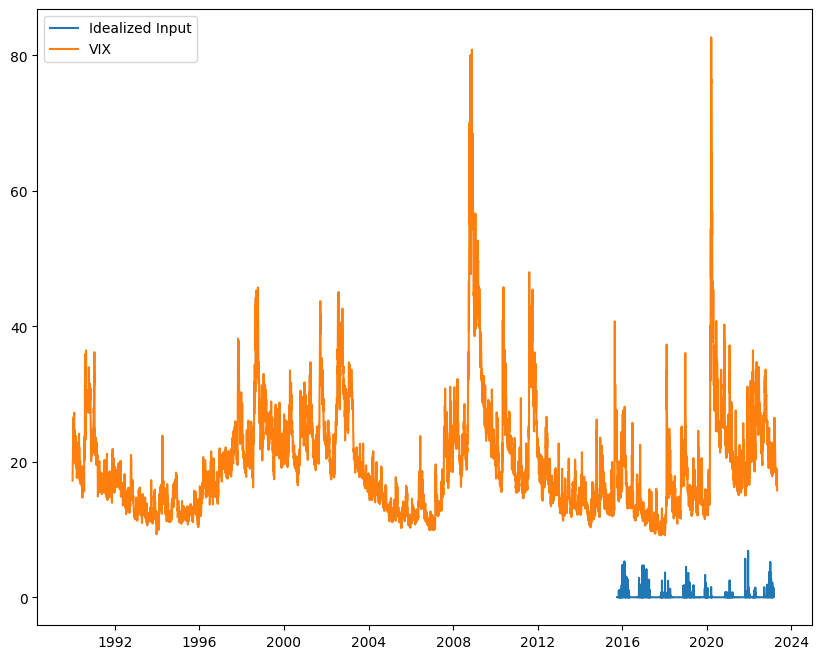

In [161]:
#fig, axs = plt.subplots(2, figsize= (10, 8))
plt.figure(figsize= (10, 8))
plt.plot(I, label = "Idealized Input")
plt.plot(d1["CLOSE"], label = "VIX" )
plt.legend()
plt.show()

$$
I_n = Q_n + k \left ( \frac{Q_{n} - Q_{n-i}}{i} \right)
$$

$$
I_n = Q_n + k \left ( \frac{Q_{n} - Q_{n-i}}{i} \right)
$$

## Reading in Data

In [162]:
percip = pd.read_csv("Data/percipitation_data.csv")
percip = pd.DataFrame(percip)
percip.columns = ["Date", "Percipitation"]
percip= percip.set_index("Date")
percip.index = pd.to_datetime(percip.index , infer_datetime_format=True)

In [163]:
flow = pd.read_csv("Data/sal_lorenzo.csv", sep = "\t")
flow = flow[["Date", "Flow"]]
flow= flow.set_index("Date")
flow.index = pd.to_datetime(flow.index , infer_datetime_format=True)

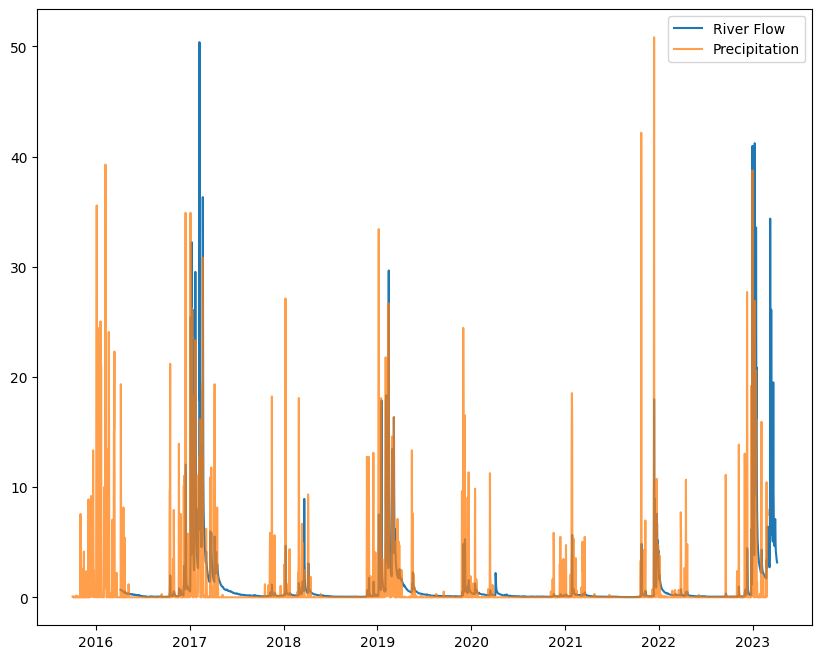

In [164]:
#fig, axs = plt.subplots(2, figsize= (10, 8))
plt.figure(figsize= (10, 8))
plt.plot(flow['Flow']/flow['Flow'].mean(), label = "River Flow")
plt.plot(percip["Percipitation"]/percip["Percipitation"].mean(), label = "Precipitation", alpha = 0.75 )
#plt.plot(pred_x, sol.y[0], label = "Predicted VIX" )
#plt.locator_params(nbins=4)
plt.legend()
plt.show()

In [165]:
gageData=pd.read_csv('Data/sanLorenzoGageData.csv', engine='python', sep='\t',skiprows=28)
gageData=gageData.drop([0])

gageData['Timestamp']=pd.to_datetime(gageData['datetime'].astype(str), infer_datetime_format=True)

pacific = pytz.timezone('US/Pacific')
gageData['Timestamp'] = gageData['Timestamp'].dt.tz_localize(pacific, ambiguous='NaT').dt.tz_convert(pytz.utc)
gageData=gageData.drop(['agency_cd', 'site_no', 'datetime', 'tz_cd'], axis=1)
gageData=gageData[pd.notnull(gageData['Timestamp'])]
gageData=gageData.rename(columns={'14696_00060': 'Flow', '14696_00060_cd': "status"}, errors="raise")
gageData['Flow']=gageData['Flow'].astype(float)
gageData=gageData.sort_values('Timestamp')
gageData =gageData.set_index("Timestamp")


In [166]:
gageData = gageData[["Flow"]]
gageData

,Flow
Timestamp,
2010-01-01 08:00:00+00:00,29.9
2010-01-01 08:15:00+00:00,29.9
2010-01-01 08:30:00+00:00,29.9
2010-01-01 08:45:00+00:00,29.3
2010-01-01 09:00:00+00:00,29.3
...,...
2022-06-29 15:30:00+00:00,15.2
2022-06-29 15:45:00+00:00,15.2
2022-06-29 16:00:00+00:00,15.7


In [167]:
rainfall=pd.read_csv('data/hourlyRainfall.csv')
rainfall=rainfall.dropna()
rainfall['Timestamp']=pd.to_datetime(rainfall['Date'].astype(str) + ' ' + rainfall['Hour (PST)'].astype(str), format="%m/%d/%Y %H%M")
pacific = pytz.timezone('US/Pacific')
rainfall['Timestamp'] = rainfall['Timestamp'].dt.tz_localize(pacific).dt.tz_convert(pytz.utc)
rainfall=rainfall.sort_values('Timestamp')
rainfall=rainfall.drop(['Date', 'CIMIS Region','Hour (PST)','Stn Id','Stn Name','Jul','qc','qc.1','qc.2','qc.3','qc.4','qc.5','qc.6','qc.7','qc.8','qc.9'], axis=1)
rainfall=rainfall.rename(columns={'Precip (mm)': 'Precip'}, errors="raise")
rainfall['Precip']=rainfall['Precip'].astype(float)

In [168]:
rainfall = rainfall[["Precip", "Timestamp"]]
rainfall =rainfall.set_index("Timestamp")
rainfall

,Precip
Timestamp,
2010-01-01 11:00:00+00:00,0.0
2010-01-01 13:00:00+00:00,0.0
2010-01-01 15:00:00+00:00,0.0
2010-01-01 17:00:00+00:00,0.0
2010-01-01 18:00:00+00:00,0.0
...,...
2021-01-01 23:00:00+00:00,0.0
2021-01-02 01:00:00+00:00,0.0
2021-01-02 03:00:00+00:00,0.0


## Scrap

In [169]:
def pred_I (i,k, Q):
    I = Q + k/i *(Q - Q.shift(-i))
    I = I.dropna()
    return I

In [170]:
n = 3
ks = np.linspace(0.01,1, n)
Is = np.linspace(1, 1, n)

NameError: name 'Flow' is not defined

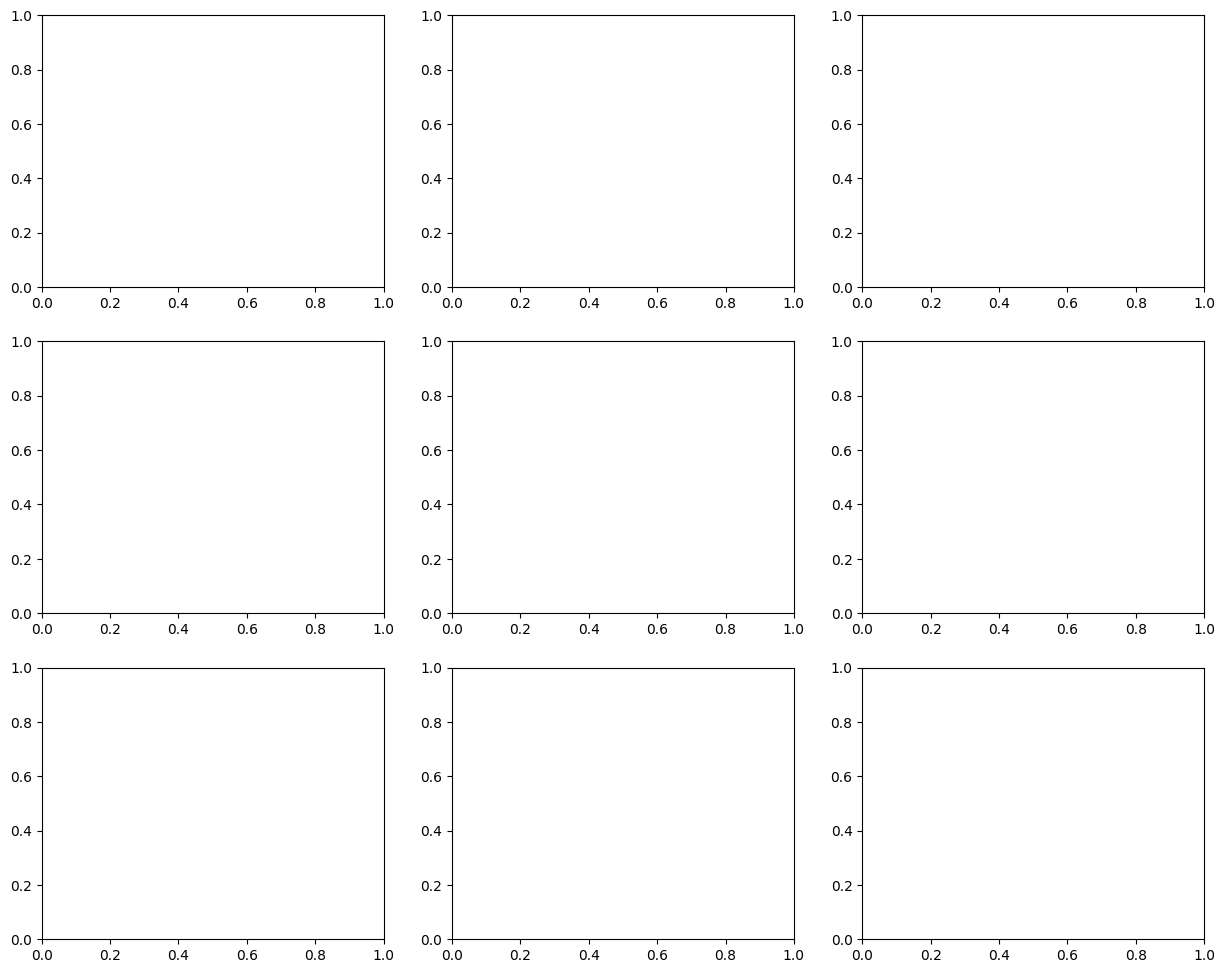

In [171]:
fig, axs = plt.subplots(nrows=n, ncols=n, figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(Flow['Flow']/flow['Flow'].mean(), label = "River Flow")
        Q = pred_I(int(Is[i]), ks[j], I)
        ax.plot(Q/Q.mean(), label = "Predicted Flow", alpha = 0.6)
        #ax.plot(Q/Q.mean(), label = "Precipitation", alpha = 0.6)
        ax.title.set_text("i = {}, k ={}".format(int(Is[i]), ks[j]))

plt.legend()
plt.show()

### Testing if River Flow is any Better than Precipitation

In [ ]:
from sklearn.linear_model import Lasso
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [ ]:
i = 1
k = 0.1  #k <1
#t = 10

In [ ]:
Q = percip["Percipitation"]
I = pred_I(i,k, Q)
flow = flow['Flow']

In [ ]:
comp_df = pd.DataFrame([flow, Q, I], ).T.dropna()
comp_df.columns = ["Flow", "Q", "I"]

### Granger Causality

In [ ]:
lags = 30

adf1 = sm.tsa.stattools.adfuller(Q, autolag='AIC')[1]
adf2 = sm.tsa.stattools.adfuller(I, autolag='AIC')[1]

if adf1 < 0.05 and adf2 < 0.05:
    granger1 = sm.tsa.stattools.grangercausalitytests(comp_df[["Flow", "Q"]], lags, verbose= False)
    granger2 = sm.tsa.stattools.grangercausalitytests(comp_df[["Flow", "I"]], lags, verbose= False)

else:
    print("Timeseries are not Stationary")

ftest1=[]
ftest2=[]
pvals1 = []
pvals2 = []
for i in range(lags):
    ftest1.append(granger1[i+1][0]['ssr_ftest'][0])
    pvals1.append(granger1[i+1][0]['ssr_ftest'][1])
    ftest2.append(granger2[i+1][0]['ssr_ftest'][0])
    pvals2.append(granger2[i+1][0]['ssr_ftest'][1])

sort_Qftest = sorted(ftest1,reverse = True) [0:5]
sort_Iftest = sorted(ftest2,reverse = True) [0:5]

print("Q")
for i in sort_Qftest:
    ind = ftest1.index(i)
    print("Lag {}: {}".format(ind +1, pvals1[ind]))

print("--------------")
print("")
print("I")
for i in sort_Iftest:
    ind = ftest2.index(i)
    print("Lag {}: {}".format(ind +1, pvals2[ind]))


In [ ]:
n = 5
ks = np.linspace(0.01,1, n)
Is = np.linspace(1, 30, n)

lags = 30

In [ ]:
Q = percip["Percipitation"]
flow_dat = flow['Flow']

for time in Is:
    for k in ks:
        print("i = {}, k = {} ".format(int(time), k))
        I = pred_I(int(time),k, Q)
        comp_df = pd.DataFrame([flow_dat, Q, I], ).T.dropna()
        comp_df.columns = ["Flow", "Q", "I"]
    

        adf1 = sm.tsa.stattools.adfuller(Q, autolag='AIC')[1]
        adf2 = sm.tsa.stattools.adfuller(I, autolag='AIC')[1]

        if adf1 < 0.05 and adf2 < 0.05:
            granger1 = sm.tsa.stattools.grangercausalitytests(comp_df[["Flow", "Q"]], lags, verbose= False)
            granger2 = sm.tsa.stattools.grangercausalitytests(comp_df[["Flow", "I"]], lags, verbose= False)

        else:
            print("Timeseries are not Stationary")

        ftest1=[]
        ftest2=[]
        pvals1 = []
        pvals2 = []
        for i in range(lags):
            ftest1.append(granger1[i+1][0]['ssr_ftest'][0])
            pvals1.append(granger1[i+1][0]['ssr_ftest'][1])
            ftest2.append(granger2[i+1][0]['ssr_ftest'][0])
            pvals2.append(granger2[i+1][0]['ssr_ftest'][1])

        sort_Qftest = sorted(ftest1,reverse = True) [0:1]
        sort_Iftest = sorted(ftest2,reverse = True) [0:1]

        for i in sort_Qftest:
            ind = ftest1.index(i)
            print("Q Lag {}: {}".format(ind +1, pvals1[ind]))

        
        for i in sort_Iftest:
            ind = ftest2.index(i)
            print("I Lag {}: {}".format(ind +1, pvals2[ind]))
        print("--------------")


        

## Continuous Integration

In [172]:
data = pd.merge(percip, flow, left_index=True, right_index=True)
start_date = "2022-01-01"
data = data[start_date:]

In [173]:
def stream_fun_parent (I, k):
    def stream_fun (t, q):
        ind= int(t)
        #print(t)
        return (I[ind] - q)*1/k
    return stream_fun

#### Comparison Plot

In [174]:
n = 9
skip = 7
ks = np.linspace(-20,20, n)


In [ ]:
fig, axs = plt.subplots(nrows=int(np.sqrt(n)), ncols=int(np.sqrt(n)), figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(data['Flow']/data['Flow'].mean(), label = "Actual River Flow")
        ind = i*int(np.sqrt(n)) + j
        k = ks[ind]
        t_eval = np.arange(0, len(data)-1)
        sol = solve_ivp(stream_fun_parent(data["Percipitation"], k), [0, len(data)-1], [data["Flow"][0]], t_eval=t_eval)
        print(sol.y[0])
        Q = sol.y[0][skip:]
        ax.plot(data.index[skip:-1], Q/Q.mean(), label = "Predicted Flow", alpha = 0.6)
        ax.title.set_text("k ={}".format(ks[ind]))

plt.legend()
plt.show()

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_1806/2034607385.py:5: RuntimeWarning: divide by zero encountered in divide
  return (I[ind] - q)*1/k
/Users/varunvaranasi/.local/share/virtualenvs/venv-3.8-pAhcsra2/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:110: RuntimeWarning: invalid value encountered in multiply
  y1 = y0 + h0 * direction * f0


IndexError: list index out of range

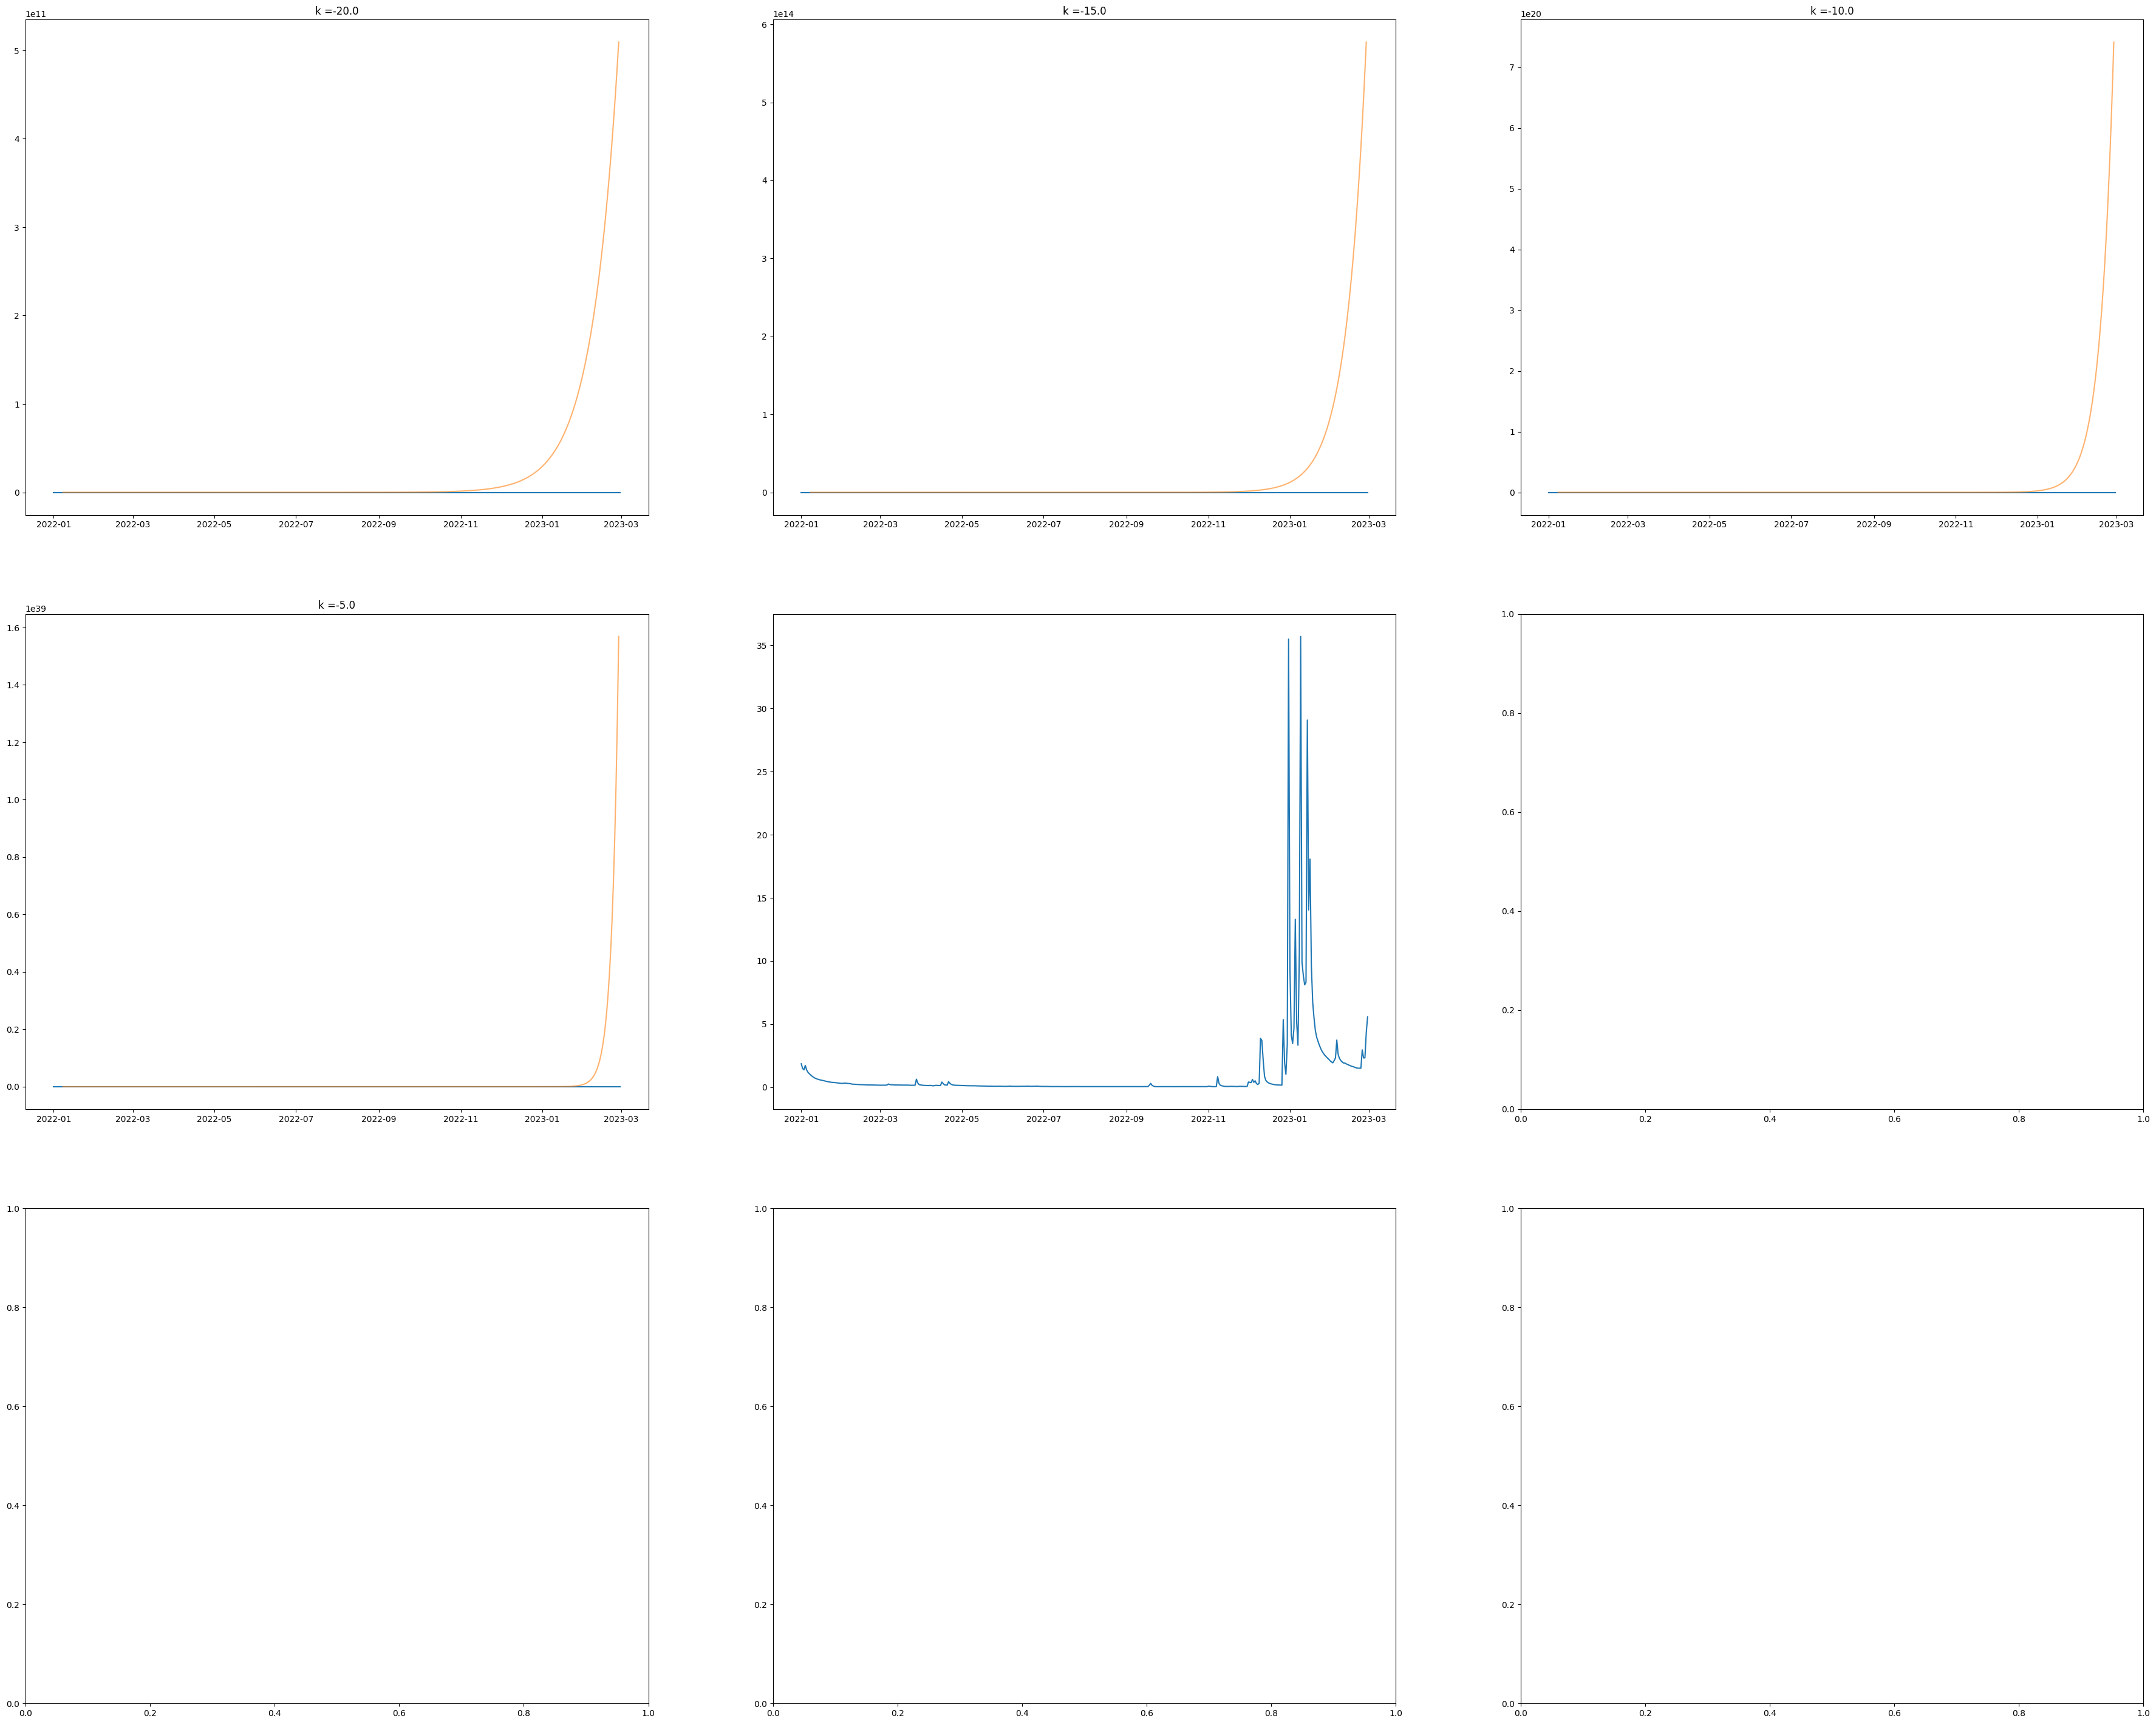

In [176]:
fig, axs = plt.subplots(nrows=int(np.sqrt(n)), ncols=int(np.sqrt(n)), figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(data['Flow']/data['Flow'].mean(), label = "Actual River Flow")
        ind = i*int(np.sqrt(n)) + j
        k = ks[ind]
        
        t_eval = np.arange(0, len(data)-1)
        sol = solve_ivp(stream_fun_parent(data["Percipitation"], k), [0, len(data)-1], [data["Flow"][0]], t_eval=t_eval)
        Q = sol.y[0][skip:]
        ax.plot(data.index[skip:-1], Q, label = "Predicted Flow", alpha = 0.6)
        ax.title.set_text("k ={}".format(ks[ind]))

plt.legend()
plt.show()

## Discrete Time Stepping

$$
I(t) = Q(t) + k \frac{\partial Q}{\partial t}
$$

$$
\Delta Q =  \frac{\Delta t}{k} (I(t) - Q(t))
$$

- streamflow in 100 cubic meters per second
- boost I units so they are same order of magnitude (estimates)
- figure out vix bug
- Sliding k value/PELT model 

In [253]:
def pred_Q (delta_t, k, data = data):
    pred_Q = list(data["Q"][:delta_t])
    index = list(data.index[:delta_t])
    time_delta = data.index[1] - data.index[0]
    for i in range(len(data["I"])):
        delta_Q = (delta_t / k) * (data["I"][i] - pred_Q[i])
        index.append(index[i] + (time_delta))
        new_Q = pred_Q[i] + delta_Q
        pred_Q.append(new_Q)

    
    return(pred_Q, index)


### Original Data

In [300]:
data = pd.merge(percip, flow, left_index=True, right_index=True)
start_date = "2021-02-10"
data = data[start_date:]
data.columns = ["I", "Q"]
data["I"] = data["I"]/np.mean(data["I"])
data["Q"] = data["Q"]/np.mean(data["Q"])

In [301]:
n = 9
t=1
ks = np.linspace(0.5,2, n)

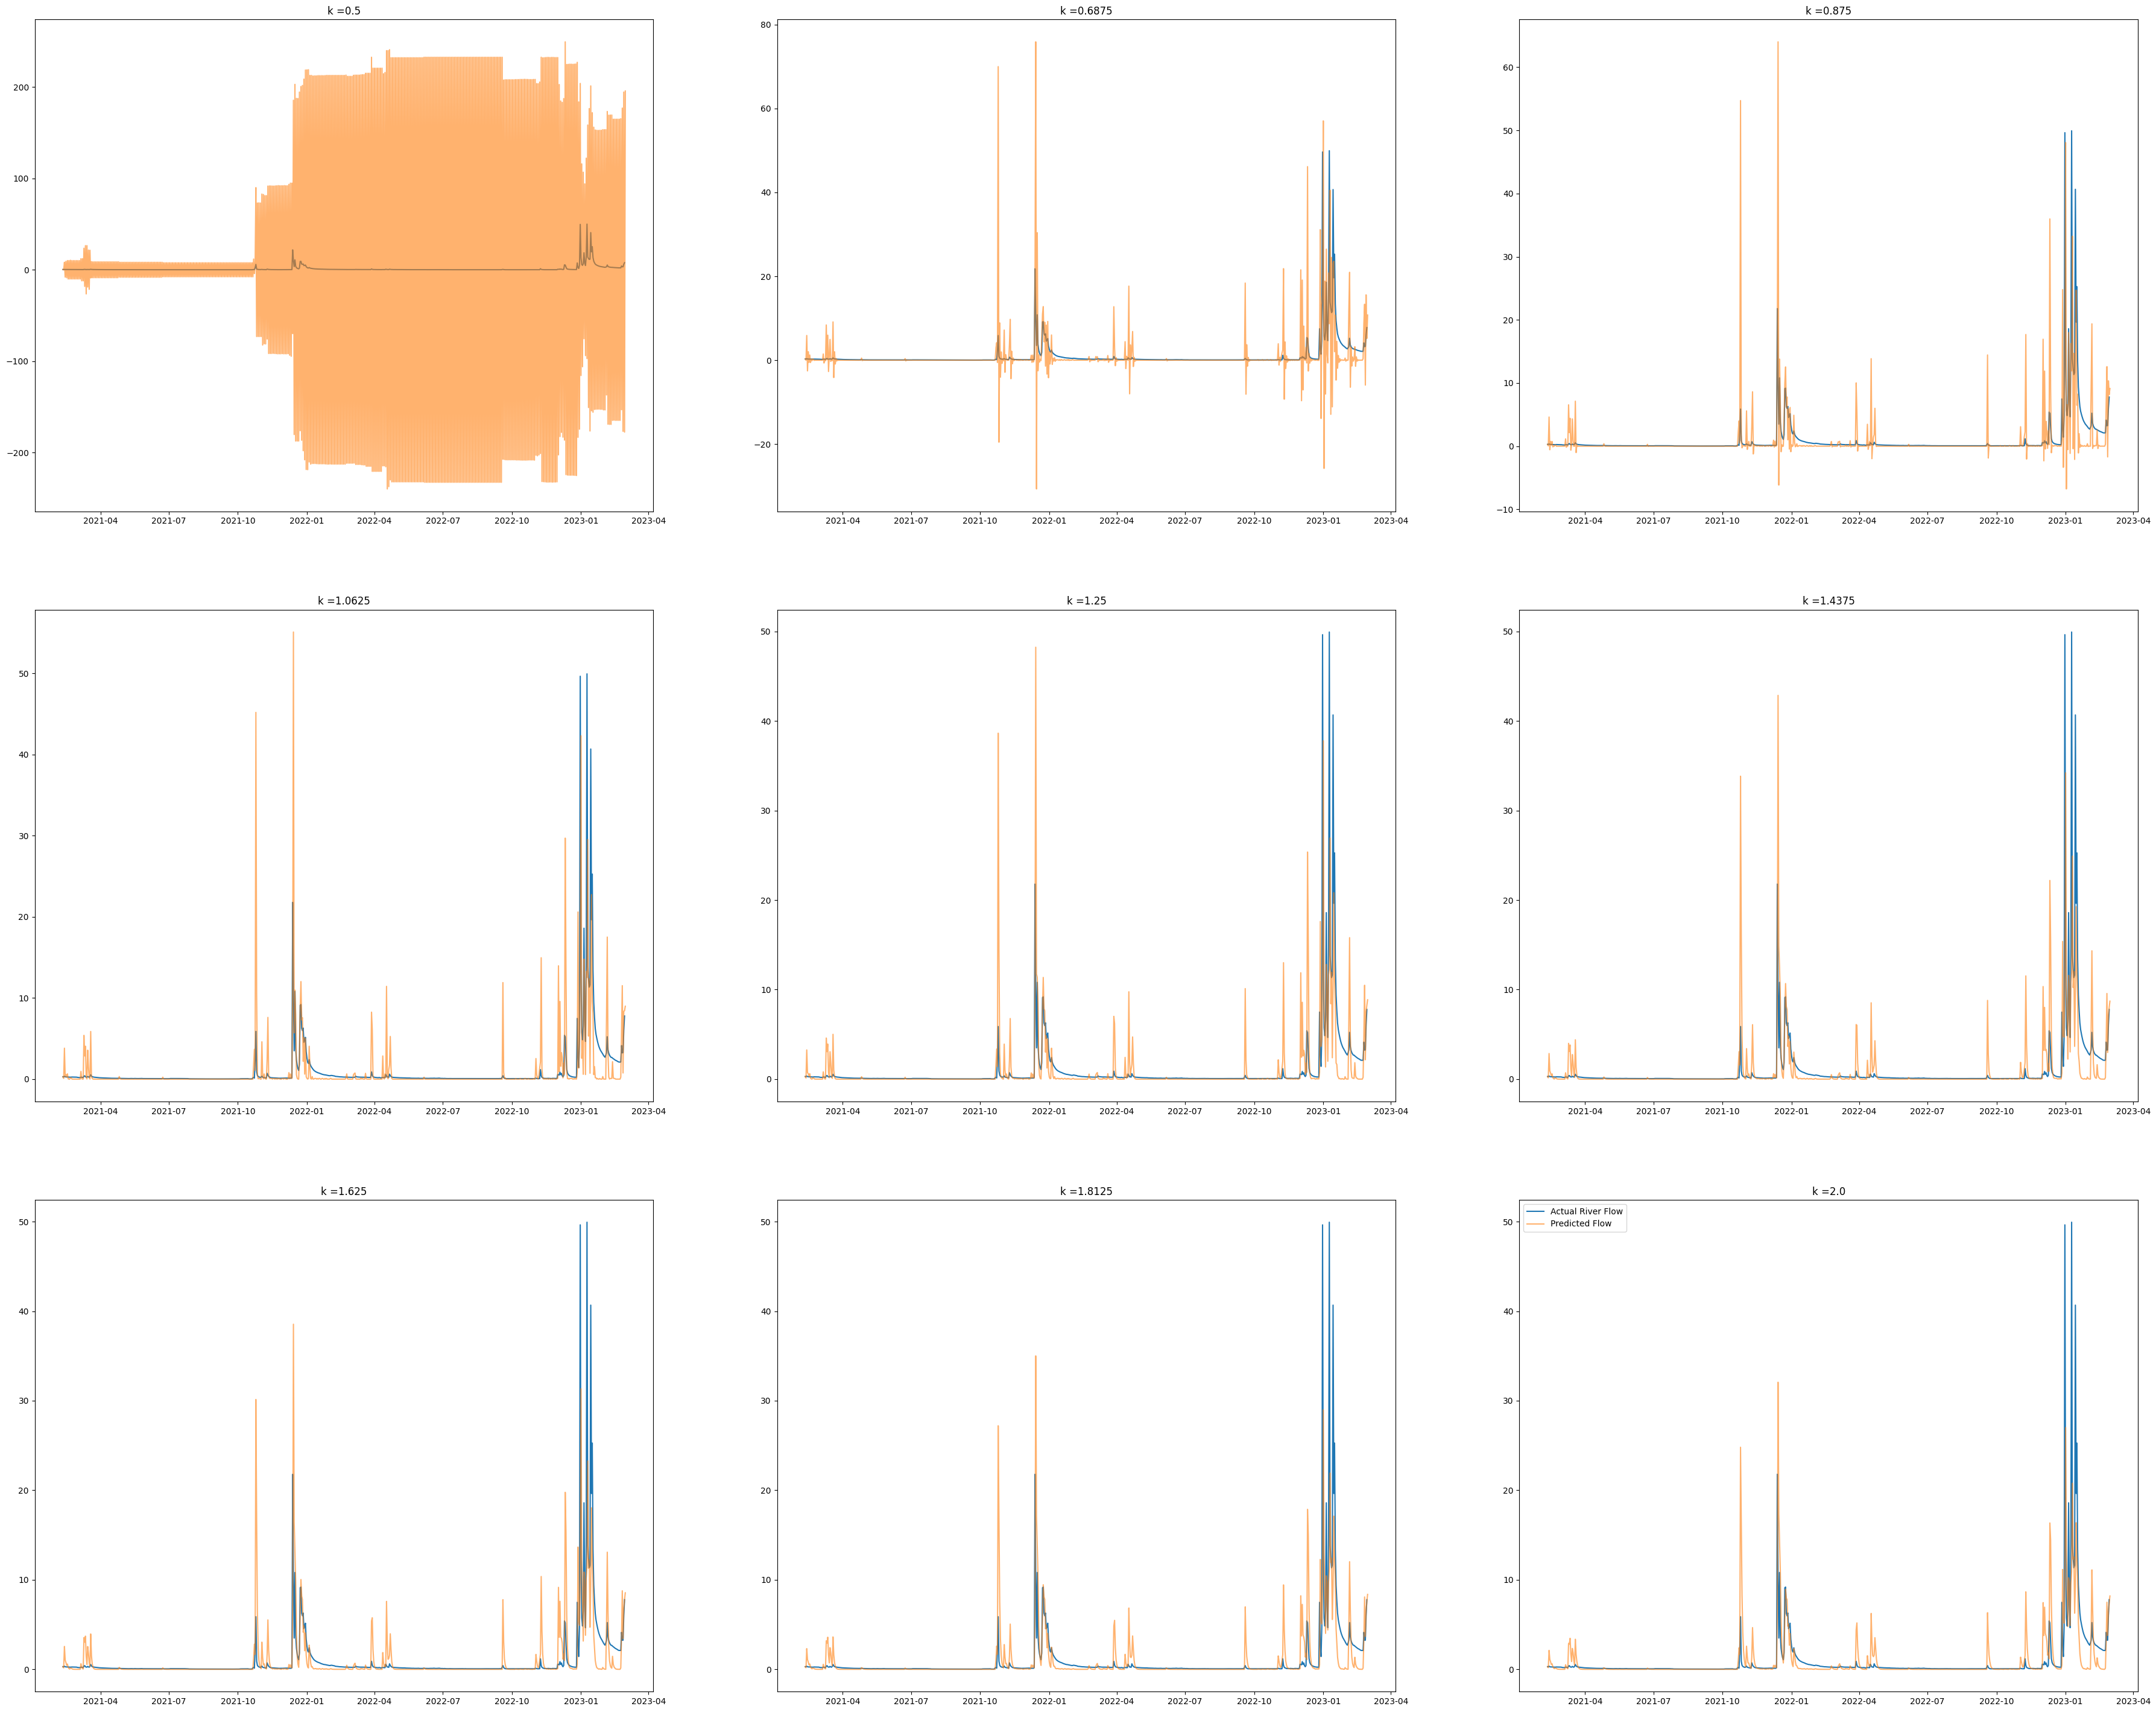

In [302]:
fig, axs = plt.subplots(nrows=int(np.sqrt(n)), ncols=int(np.sqrt(n)), figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(data['Q'], label = "Actual River Flow")
        ind = i*int(np.sqrt(n)) + j
        k = ks[ind]
        
        Q, index = pred_Q(t, k, data)
        pred = pd.DataFrame(Q, index = index).dropna()
        
        
        ax.plot(pred, label = "Predicted Flow", alpha = 0.6)
        ax.title.set_text("k ={}".format(ks[ind]))

plt.legend()
plt.show()

### New Data (Higher Cadence)

In [303]:
data = pd.merge(gageData, rainfall, left_index=True, right_index=True)
start_date = "2020-02-10"
data = data[start_date:]
data.columns = ["Q", "I"]
data["I"] = data["I"]/np.mean(data["I"])
data["Q"] = data["Q"]/np.mean(data["Q"])
data=data.dropna()


In [304]:
n = 9
t=1
ks = np.linspace(0.5,2, n)

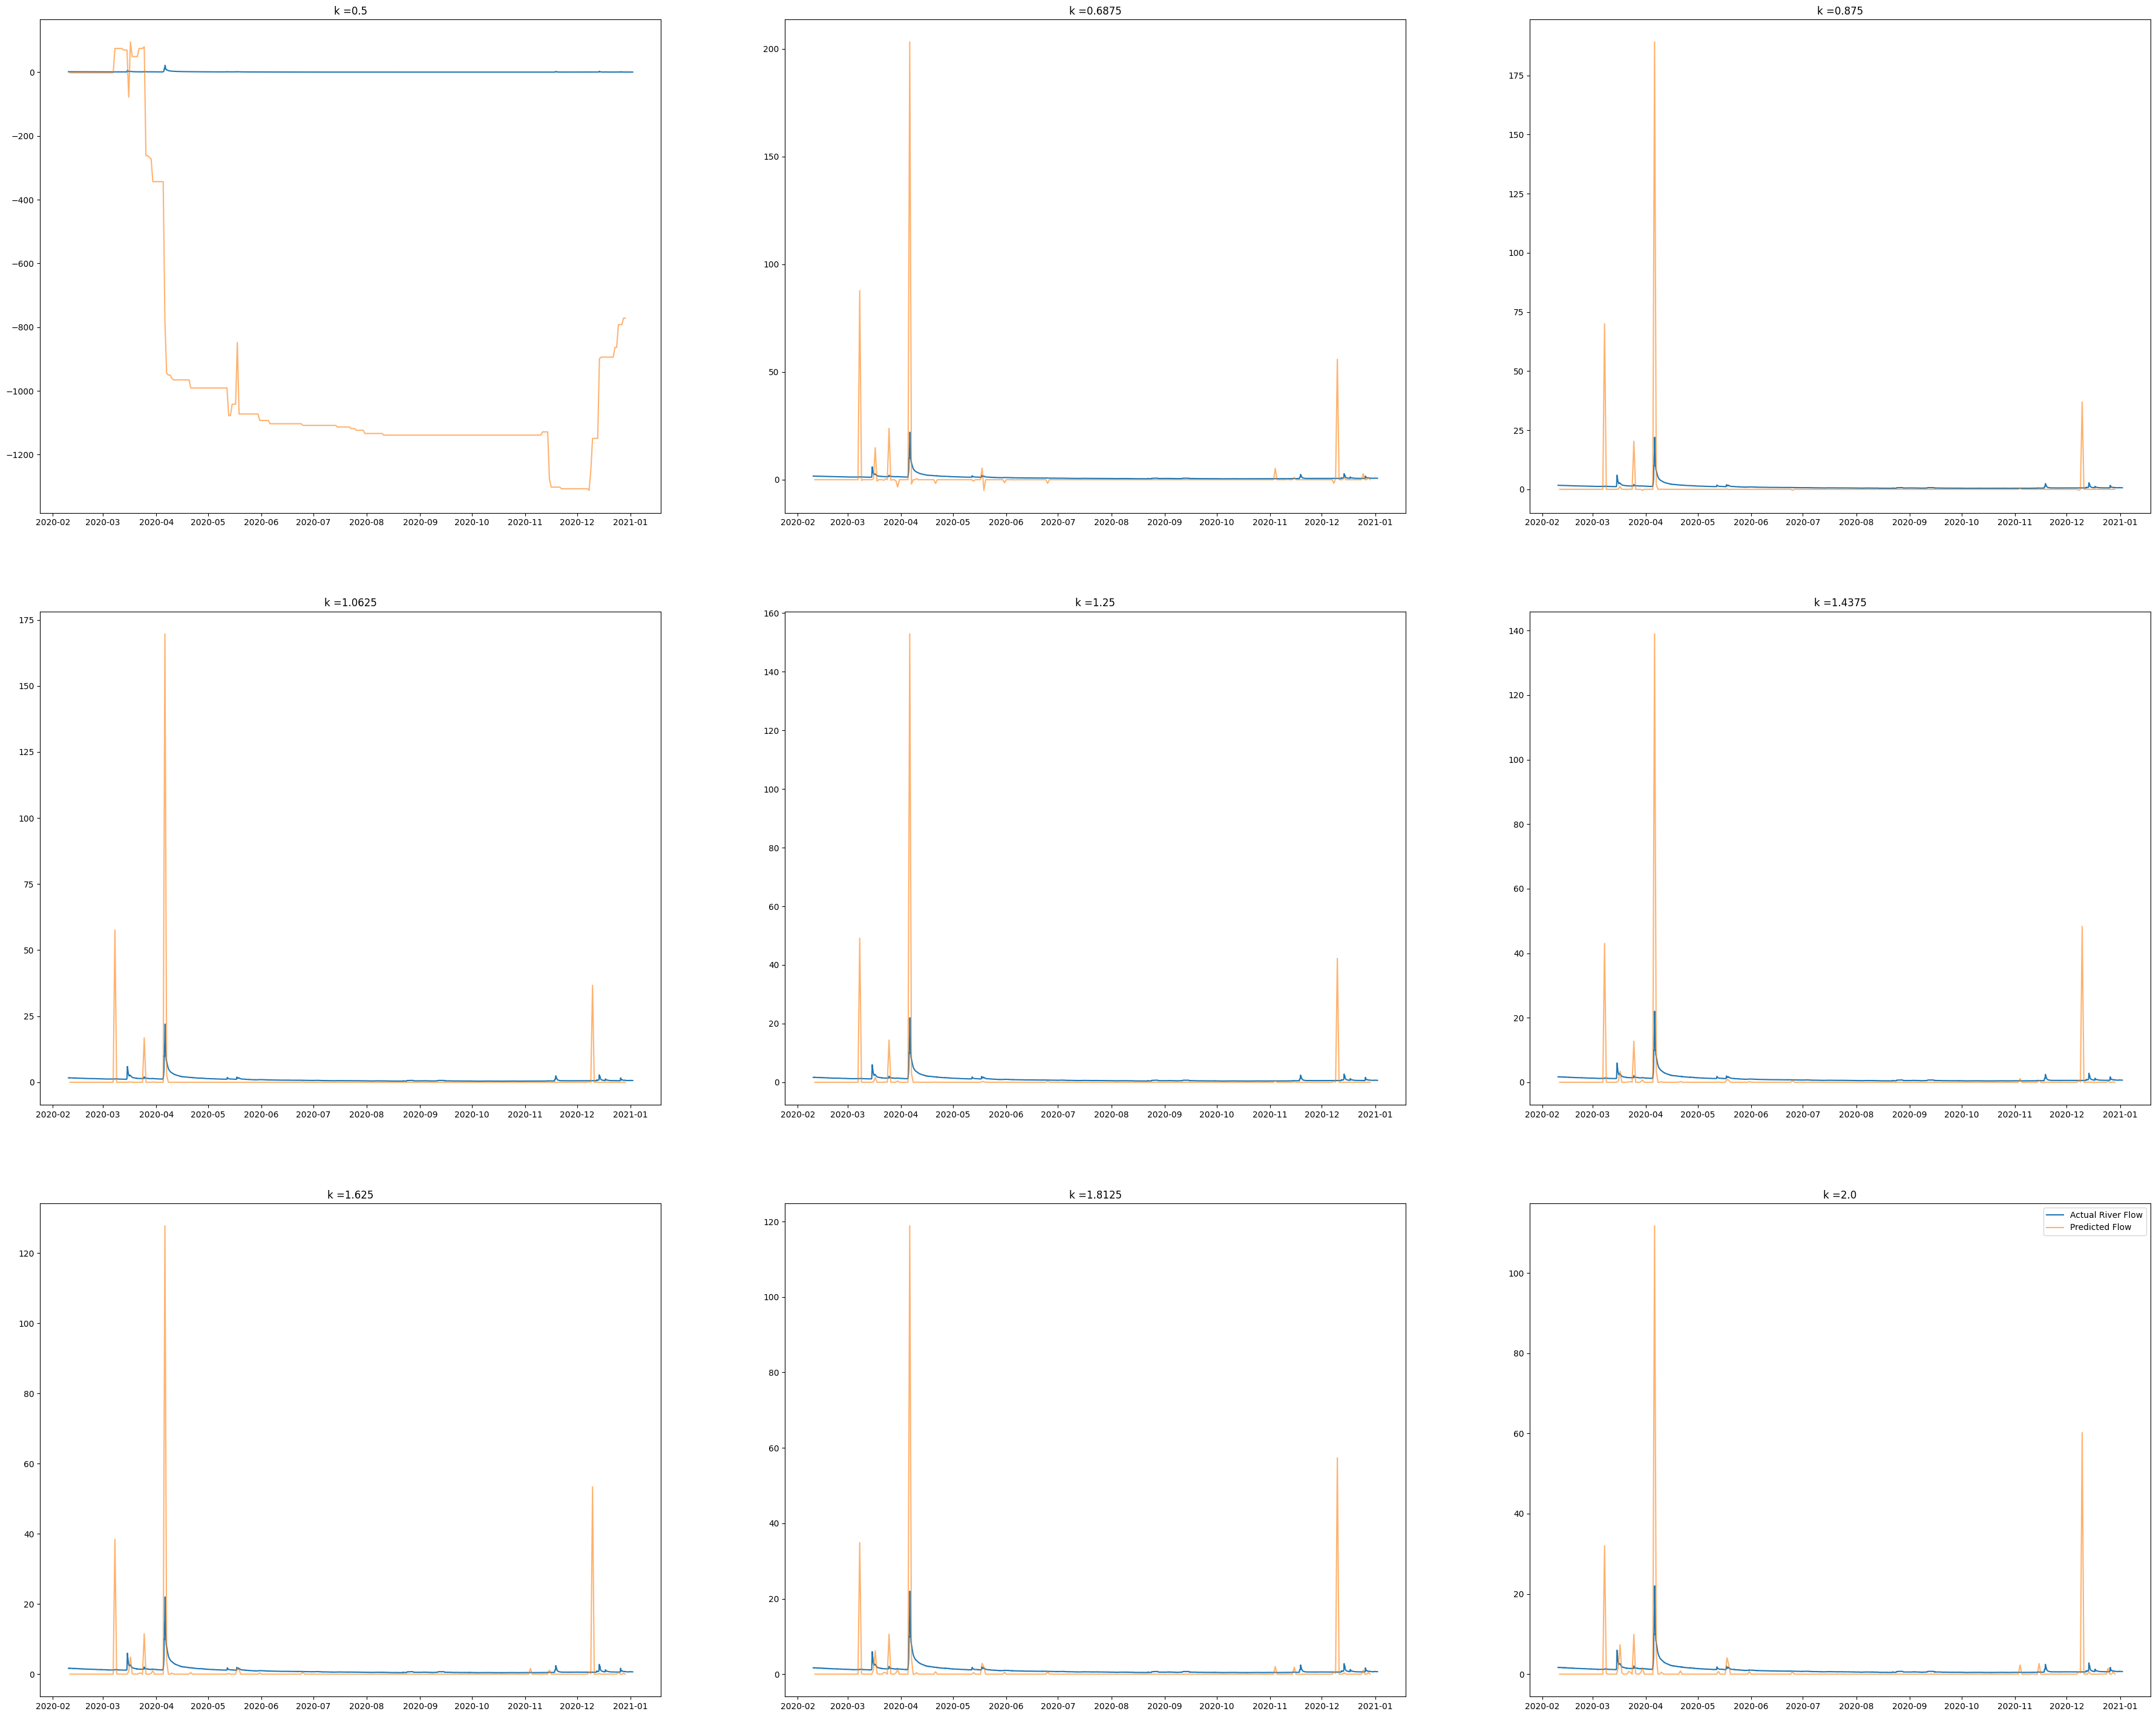

In [305]:
fig, axs = plt.subplots(nrows=int(np.sqrt(n)), ncols=int(np.sqrt(n)), figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(data['Q'], label = "Actual River Flow")
        ind = i*int(np.sqrt(n)) + j
        k = ks[ind]
        
        Q, index = pred_Q(t, k, data)
        pred = pd.DataFrame(Q, index = index)
        pred = pred.resample("D").ffill().dropna()
        
        ax.plot(pred, label = "Predicted Flow", alpha = 0.6)
        ax.title.set_text("k ={}".format(ks[ind]))

plt.legend()
plt.show()

## Metaculus-VIX Prediction

In [187]:
d1_name ="Data/VIX_History*"
d1_filename = glob.glob(d1_name)[0]
d1= pd.read_csv(d1_filename)
d1.columns = d1.columns.str.upper()
d1['DATE'] = pd.to_datetime(d1["DATE"])
d1= d1.set_index("DATE")
vix = d1[["CLOSE"]]

In [271]:
vix

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2023-04-24,16.89
2023-04-25,18.76
2023-04-26,18.84


In [277]:
t_del = 1
index = []
new_data=[]
for i in range (1, len(vix)-1):
    if vix.index[i] != (vix.index[i-1] + datetime.timedelta(1)) :
        index.append(vix.index[i-1] + datetime.timedelta(1))
        new_data.append( vix["CLOSE"][i-1])
    if vix.index[i] != (vix.index[i+1] - datetime.timedelta(1)) :
        index.append(vix.index[i+1] - datetime.timedelta(1))
        new_data.append(vix["CLOSE"][i+1])
  

In [281]:
new_data =pd.DataFrame(new_data, index = index, columns = ["CLOSE"])

In [283]:
vix =vix.append(new_data)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_1806/1846275332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vix =vix.append(new_data)


In [284]:
d2_name ="Data/2_Day_Smooth_Metaculus_Users_*"
d2_filename = glob.glob(d2_name)[0]
d2= pd.read_csv(d2_filename)
d2.columns = d2.columns.str.upper()
d2['DATE'] = pd.to_datetime(d2["DATE"])
d2= d2.set_index("DATE")
d2.columns = ["META"]
metaculus = d2


In [285]:
data = pd.merge(vix, metaculus, left_index=True, right_index=True)
start_date = "2020-01-01"
data= data[start_date:]
data["Q"] = data["CLOSE"]/np.mean(data["CLOSE"])
data["I"] = data["META"]/np.mean(data["META"])
data=data.dropna()
data

,CLOSE,META,Q,I
2020-01-01,12.47,301,0.510026,0.281117
2020-01-01,13.78,301,0.563605,0.281117
2020-01-02,12.47,286,0.510026,0.267108
2020-01-03,14.02,278,0.573421,0.259636
2020-01-04,14.02,254,0.573421,0.237221
...,...,...,...,...
2022-04-03,18.57,1751,0.759517,1.635333
2022-04-04,18.57,1787,0.759517,1.668955
2022-04-05,21.03,1680,0.860131,1.569023
2022-04-06,22.10,1507,0.903895,1.407451


In [295]:
data = data.sort_index()

#### Continuous Prediction

In [286]:
n = 9
skip = 7
ks = np.linspace(0.01,1, n)

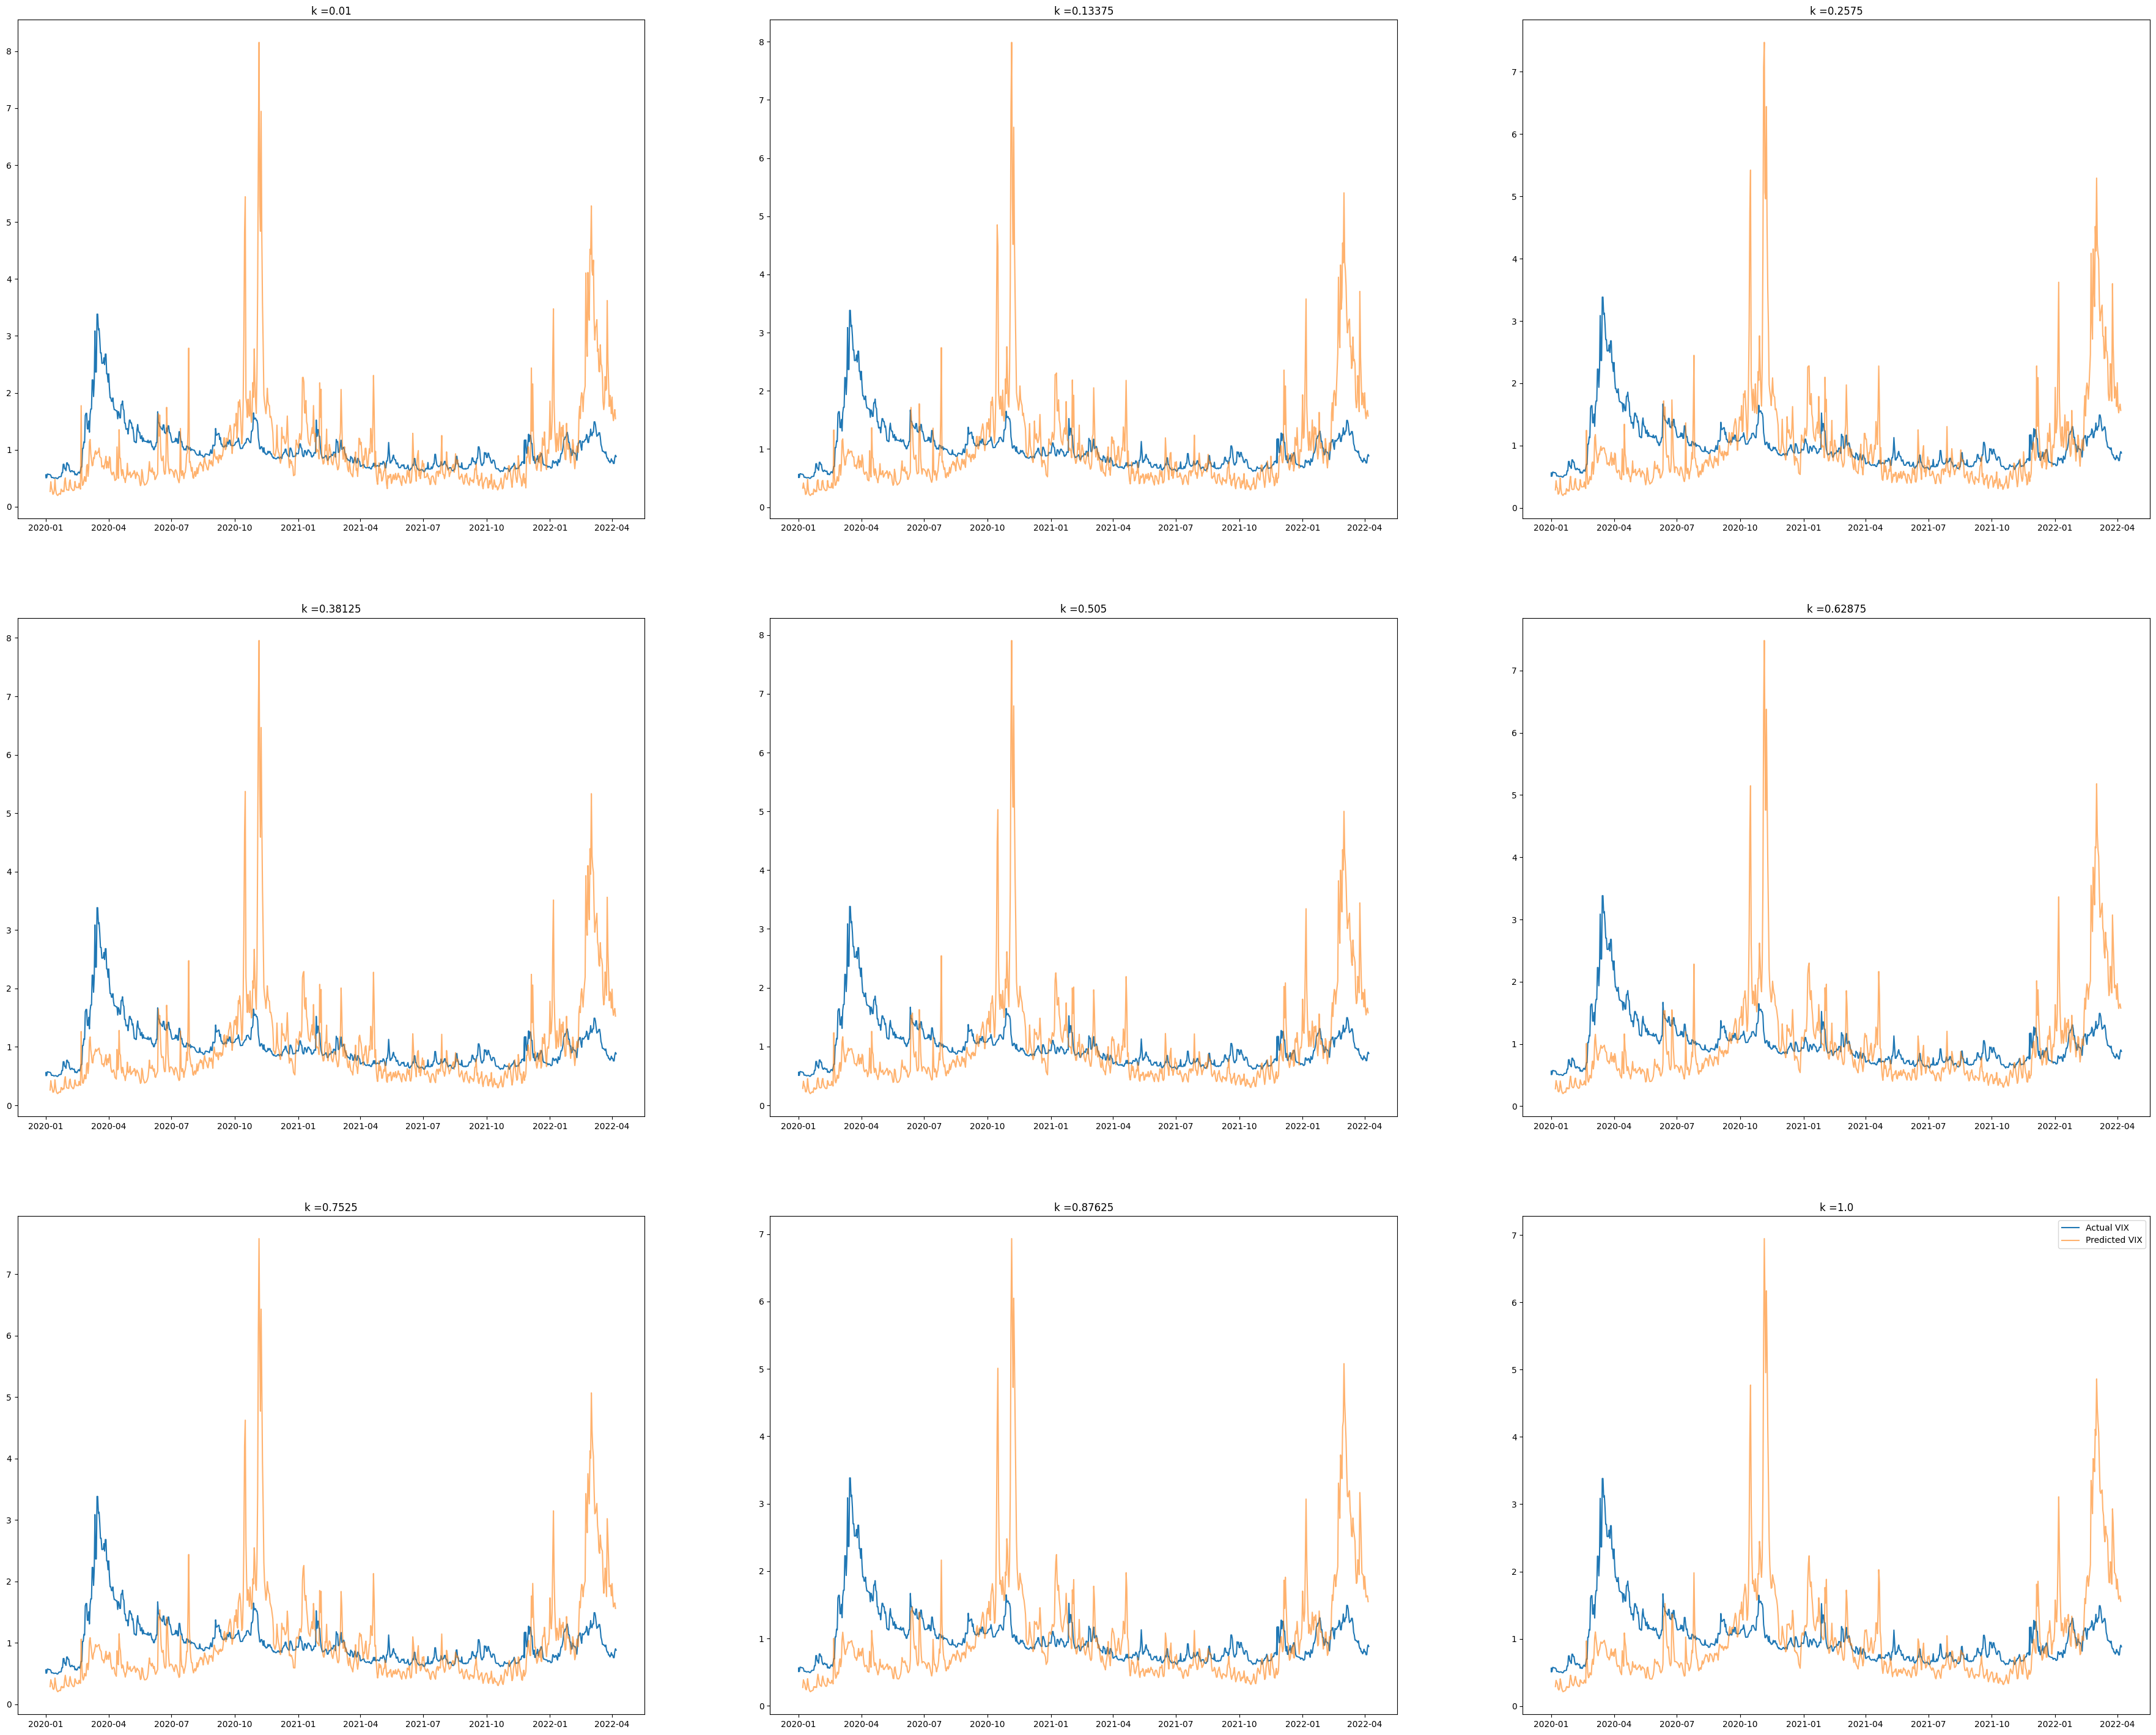

In [287]:
fig, axs = plt.subplots(nrows=int(np.sqrt(n)), ncols=int(np.sqrt(n)), figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(data['CLOSE']/data['CLOSE'].mean(), label = "Actual VIX")
        ind = i*int(np.sqrt(n)) + j
        k = ks[ind]
        t_eval = np.arange(0, len(data)-1)
        sol = solve_ivp(stream_fun_parent(data["META"], k), [0, len(data)-1], [data["CLOSE"][0]], t_eval=t_eval)
        Q = sol.y[0][skip:]
        ax.plot(data.index[skip:-1], Q/Q.mean(), label = "Predicted VIX", alpha = 0.6)
        ax.title.set_text("k ={}".format(ks[ind]))

plt.legend()
plt.show()

#### Discrete Prediction

In [296]:
n = 9
t = 1
ks = np.linspace(0.5, n)

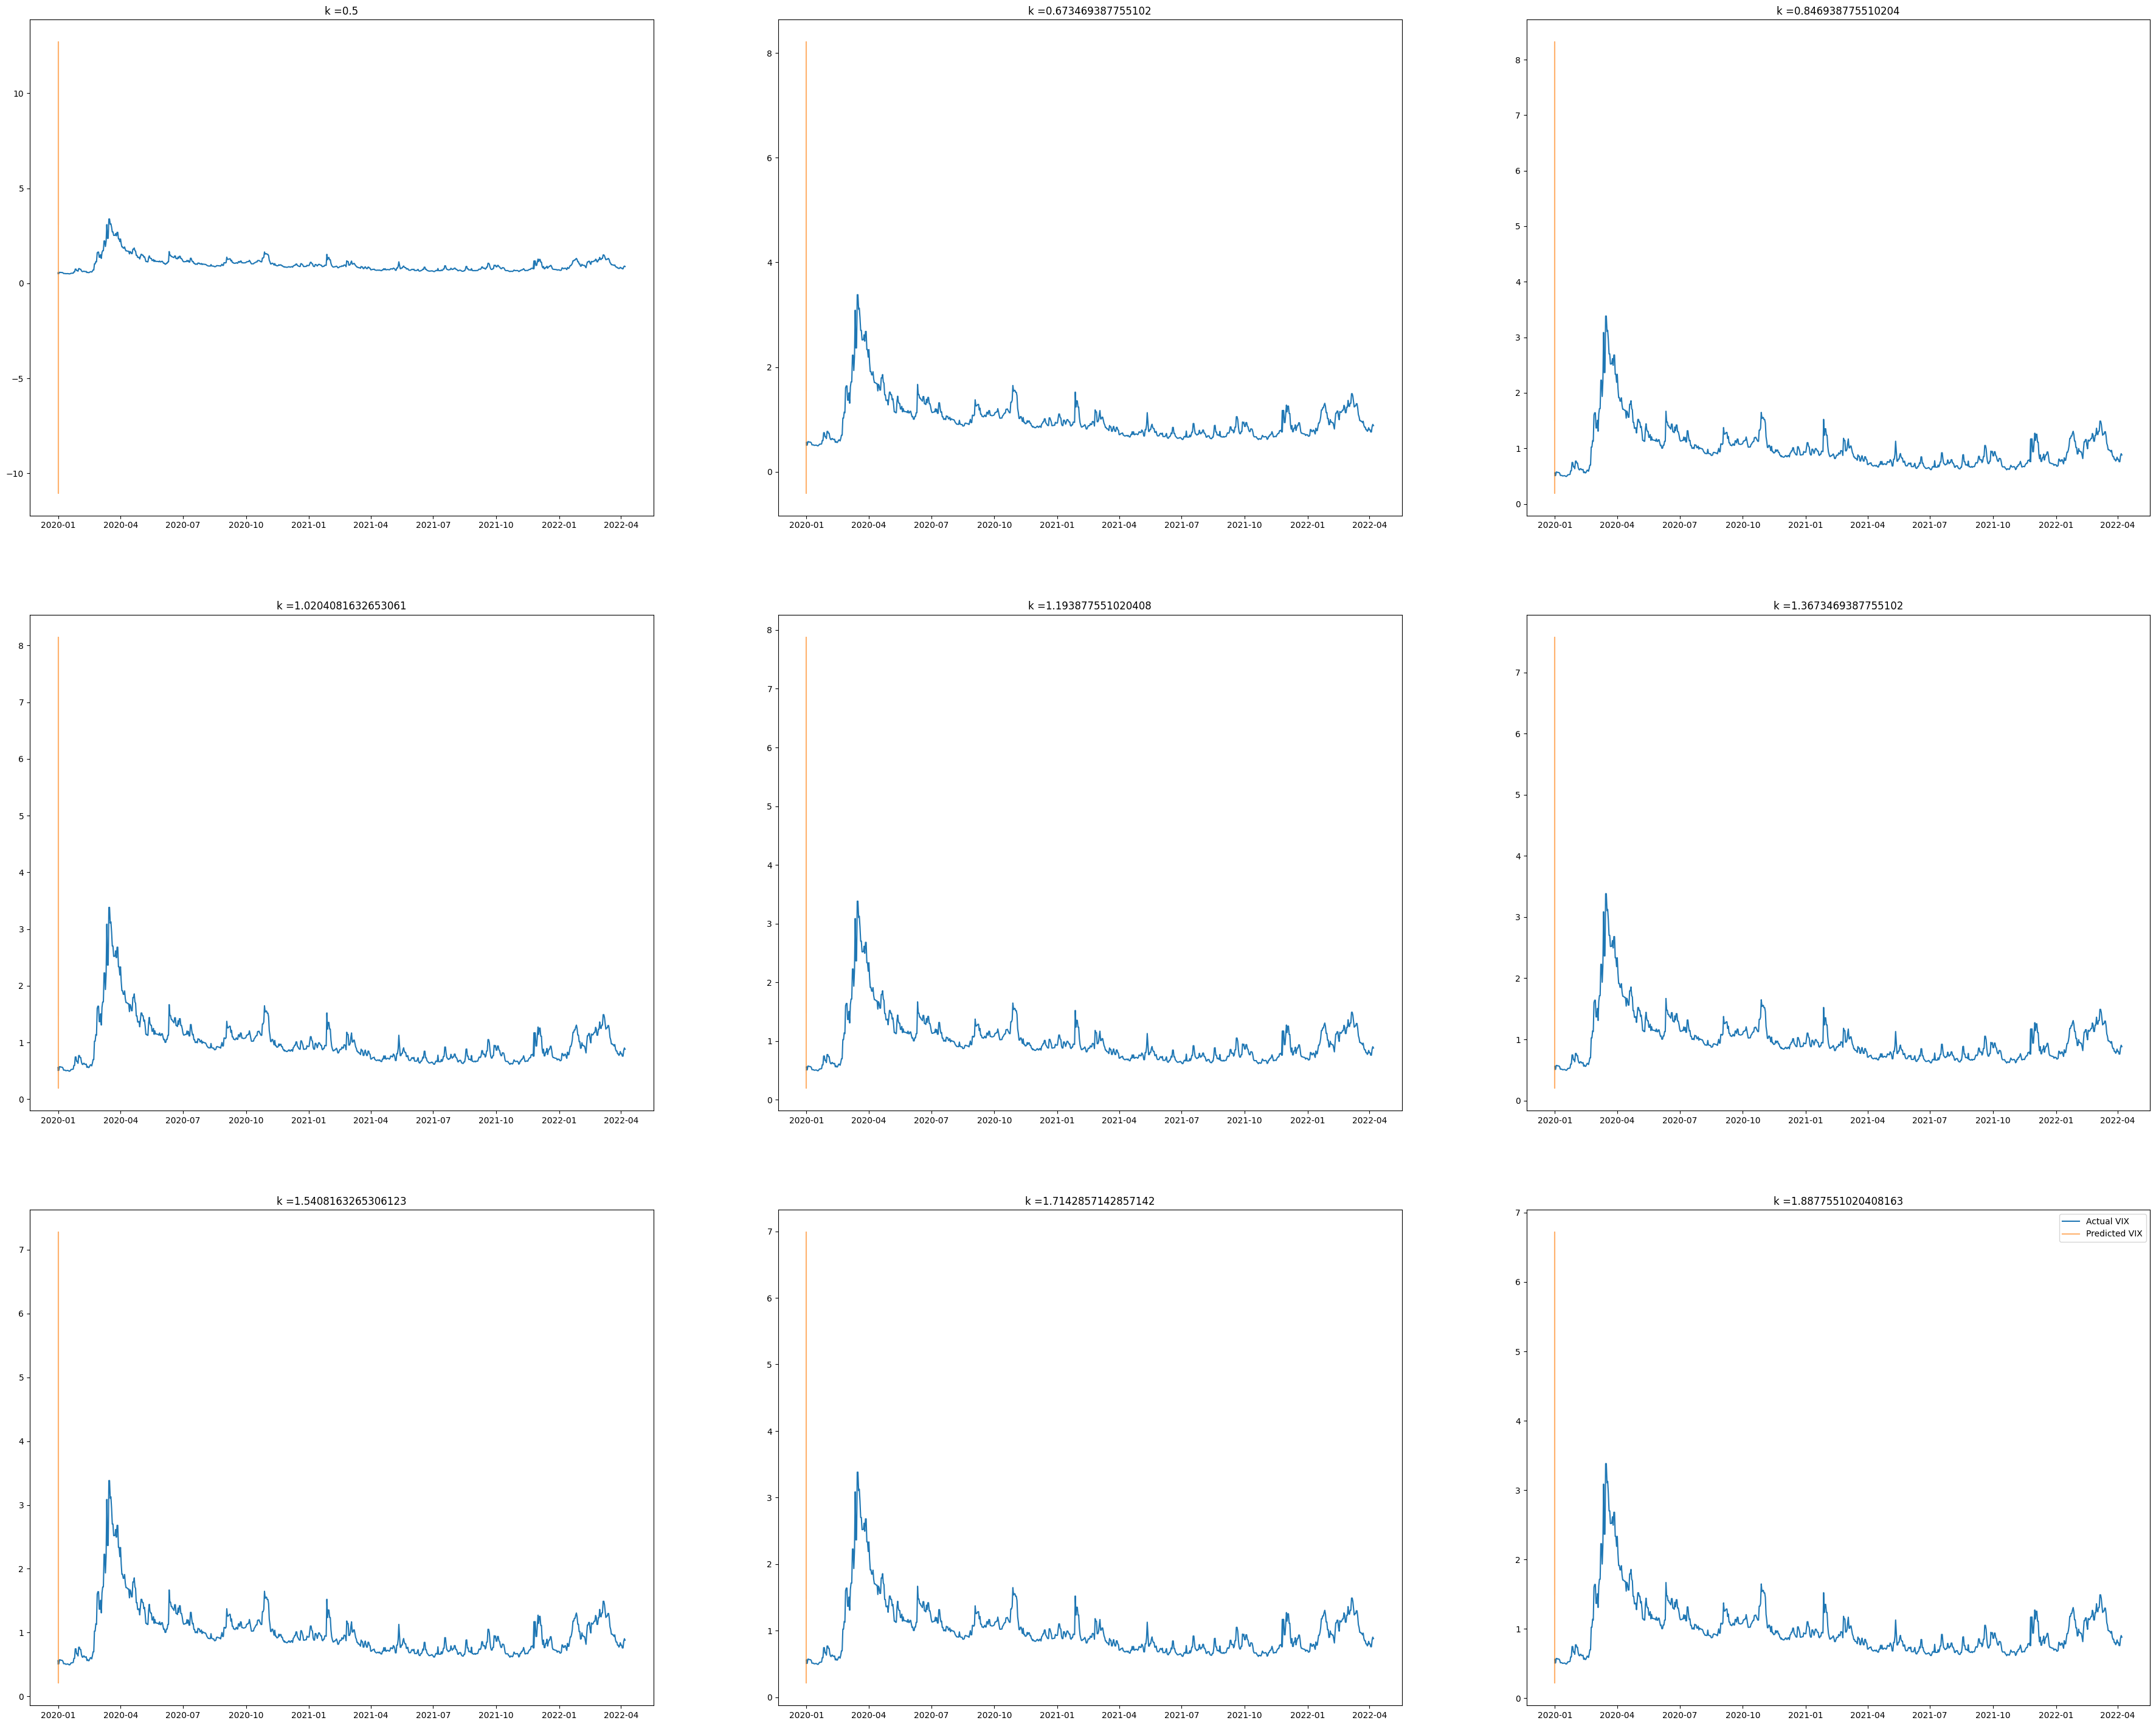

In [297]:
fig, axs = plt.subplots(nrows=int(np.sqrt(n)), ncols=int(np.sqrt(n)), figsize= (5*n, 4*n))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(data['Q'], label = "Actual VIX")
        ind = i*int(np.sqrt(n)) + j
        k = ks[ind]
        
        Q, index = pred_Q(t, k, data)
        pred = pd.DataFrame(Q, index = index)
        #pred = pred.resample("D").ffill().dropna()

        ax.plot(pred, label = "Predicted VIX", alpha = 0.6)
        ax.title.set_text("k ={}".format(ks[ind]))

plt.legend()
plt.show()

In [198]:
pred

,0
2020-01-02,0.508402
2020-01-03,0.374075
2020-01-04,0.307129
2020-01-05,0.279894
2020-01-06,0.354876
...,...
2021-07-23,1.701367
2021-07-24,1.643545
2021-07-25,1.565850
2021-07-26,1.447658


### Granger Causality

In [ ]:
k = 0.5
skip = 7
sol = solve_ivp(stream_fun_parent(data["META"], k), [0, len(data)-1], [data["CLOSE"][0]], t_eval=t_eval)
Q = sol.y[0][skip:]

I = data["CLOSE"]

In [ ]:
comp_df = pd.DataFrame([Q, I], ).T.dropna()
comp_df.columns = ["Q", "I"]
comp_df

In [ ]:
lags = 30

In [ ]:

adf1 = sm.tsa.stattools.adfuller(Q, autolag='AIC')[1]
adf2 = sm.tsa.stattools.adfuller(I, autolag='AIC')[1]

if adf1 < 0.05 and adf2 < 0.05:
    granger1 = sm.tsa.stattools.grangercausalitytests(comp_df[["I", "Q"]], lags, verbose= False)

else:
    print("Timeseries are not Stationary")

ftest1=[]

pvals1 = []
for i in range(lags):
    ftest1.append(granger1[i+1][0]['ssr_ftest'][0])
    pvals1.append(granger1[i+1][0]['ssr_ftest'][1])

    sort_Qftest = sorted(ftest1,reverse = True) [0:1]

for i in sort_Qftest:
    ind = ftest1.index(i)
    print("Q Lag {}: {}".format(ind +1, pvals1[ind]))

        
    